In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Part 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


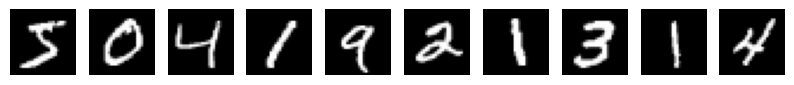

label for each of the above image: [5 0 4 1 9 2 1 3 1 4]


In [14]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

x_train shape: (60000, 28, 28),
 y_train shape: (60000,)


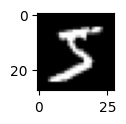

/var/folders/wd/_vtbthvs7szg1hl8nj3sx92w0000gn/T/ipykernel_13814/622129713.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(28, 1, i+1)


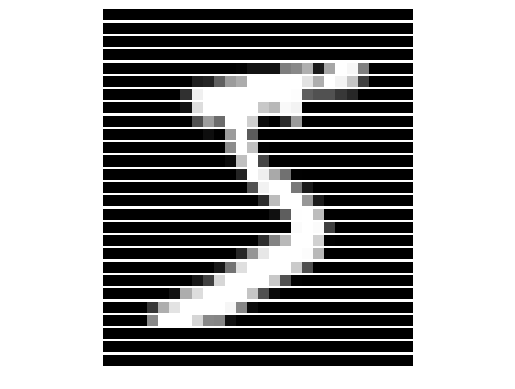

In [15]:

# Part 2: Preprocess
x_train = x_train / 255.0  # normalize to [0,1]
x_test = x_test / 255.0
print(f"x_train shape: {x_train.shape},\n y_train shape: {y_train.shape}")
plt.figure(figsize=(1, 1))
plt.imshow(x_train[0], cmap="gray")
plt.show()
for i in range(28):
    # print(x_train[0][i])
    plt.imshow(x_train[0][i].reshape(-1,28), cmap="gray")
    plt.subplot(28, 1, i+1)
    plt.axis('off')
plt.show()


x_train shape: (60000, 784),
 y_train shape: (60000,)


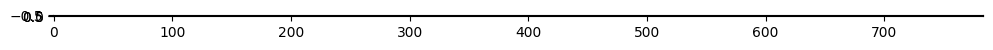

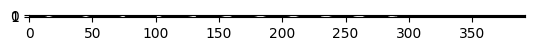

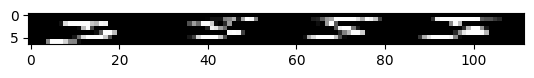

In [16]:
# Flatten the images (28x28 -> 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
print(f"x_train shape: {x_train.shape},\n y_train shape: {y_train.shape}")
plt.figure(figsize=(12, 12))
plt.imshow(x_train[0].reshape(1, int((28*28)/1)), cmap="gray")
plt.show()
plt.imshow(x_train[0].reshape(2, int((28*28)/2)), cmap="gray")
plt.show()
plt.imshow(x_train[0].reshape(7, int((28*28)/7)), cmap="gray")
plt.show()

In [17]:
x_train[0].shape

(784,)

In [18]:

# Part 3: Build the FFNN model
model = models.Sequential([
    layers.Input(shape=(784,)),              # Input layer (flattened image)
    layers.Dense(128, activation='relu'),    # Hidden layer
    # layers.Dense(128, activation='relu'),    # Hidden layer
    layers.Dense(10, activation='softmax')   # Output layer (10 classes)
])

# Part 4: Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8764 - loss: 0.4509 - val_accuracy: 0.9672 - val_loss: 0.1257
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9623 - loss: 0.1275 - val_accuracy: 0.9733 - val_loss: 0.0930
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9752 - loss: 0.0817 - val_accuracy: 0.9757 - val_loss: 0.0875
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9836 - loss: 0.0585 - val_accuracy: 0.9765 - val_loss: 0.0849
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9865 - loss: 0.0451 - val_accuracy: 0.9765 - val_loss: 0.0756
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9898 - loss: 0.0343 - val_accuracy: 0.9750 - val_loss: 0.0909
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9918 - loss: 0.0270 - val_accuracy: 0.9753 - val_loss: 0.0866
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9937 - loss: 0.0207 - 

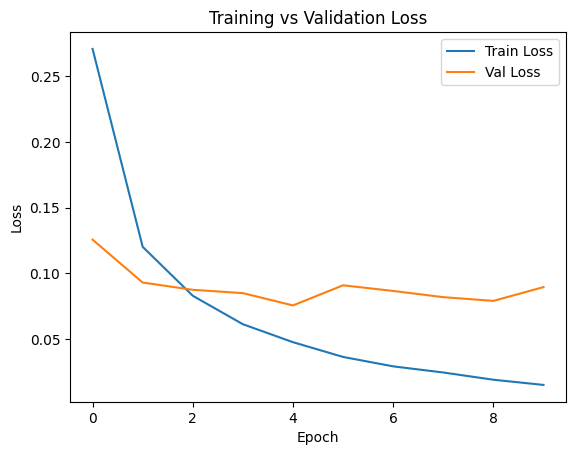

In [19]:

# Part 5: Train
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

# Part 6: Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9749 - loss: 0.0980
Test Accuracy: 0.9778


In [21]:
print(y_train[:5])         # Should show numbers like [5 0 4 1 9]
print(y_train.shape)       # Should be (60000,)
print(x_train.shape)       # Should be (60000, 784)


[5 0 4 1 9]
(60000,)
(60000, 784)


You caught that perfectly — **yes, that pattern indicates overfitting** is starting to happen. Great observation!

---

### 📉 What You Observed:

- **Training loss** keeps going down → model is fitting the training data better and better.
- **Validation/Test loss** stops improving (plateaus), or even gets slightly worse.

This means:
> The model is starting to memorize the training data instead of learning generalizable patterns.

---

## 🧠 Why Overfitting Happens?

Because the model:
- Has **more capacity** than needed (too many neurons/layers)
- Is trained **too long** (many epochs)
- Is **not regularized** (i.e., no dropout, L2, etc.)
- Has **no noise** or **data augmentation**

---

## ✅ How to Handle Overfitting?

### 1. **Early Stopping**
Stop training when validation loss stops improving.

```python
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    callbacks=[callback]
)
```

---

### 2. **Add Dropout**
Randomly turns off neurons during training → helps prevent memorization.

```python
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
```

---

### 3. **Reduce Model Size**
If you're overfitting fast, try fewer neurons or layers:
```python
# Example: smaller model
layers.Dense(64, activation='relu')
```

---

### 4. **Regularization**
Penalize large weights with L2 (Ridge-like behavior):

```python
layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))
```

---

### 5. **More Data / Augmentation** (not applicable to MNIST much, but good to know)

---

## 📊 Optional: Plot the Loss Curves

```python
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.show()
```

Look for:
- **Train loss decreasing** ✅
- **Val loss flattening or increasing** → 📢 Start regularization

---

## 🔁 TL;DR — Yes, You're Overfitting!

You're absolutely right to spot it. And now you know the classic tools to fight it:
- EarlyStopping
- Dropout
- Smaller models
- L2 regularization

---

Want to try adding one of these into your code now? I can walk you through it — maybe try **dropout + early stopping**?

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9967 - loss: 0.0117 - val_accuracy: 0.9805 - val_loss: 0.0825
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9972 - loss: 0.0102 - val_accuracy: 0.9807 - val_loss: 0.0859
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9976 - loss: 0.0082 - val_accuracy: 0.9798 - val_loss: 0.0886
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9979 - loss: 0.0083 - val_accuracy: 0.9797 - val_loss: 0.0910
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9749 - loss: 0.0931
Test Accuracy: 0.9777


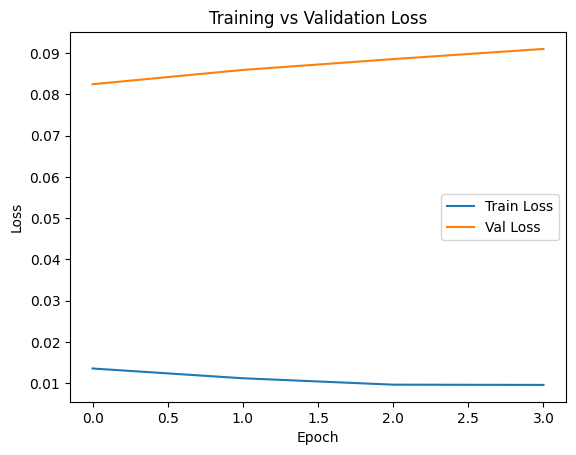

In [22]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    callbacks=[callback]
)

# Part 6: Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

## Adding Dropout layer

In [23]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7893 - loss: 0.6749 - val_accuracy: 0.9665 - val_loss: 0.1190
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9394 - loss: 0.2082 - val_accuracy: 0.9708 - val_loss: 0.1004
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9483 - loss: 0.1747 - val_accuracy: 0.9750 - val_loss: 0.0872
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9559 - loss: 0.1472 - val_accuracy: 0.9775 - val_loss: 0.0775
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9629 - loss: 0.1273 - val_accuracy: 0.9785 - val_loss: 0.0743
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9648 - loss: 0.1195 - val_accuracy: 0.9777 - val_loss: 0.0735
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9664 - loss: 0.1101 - val_accuracy: 0.9805 - val_loss: 0.0665
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9696 - loss: 0.0997 - 

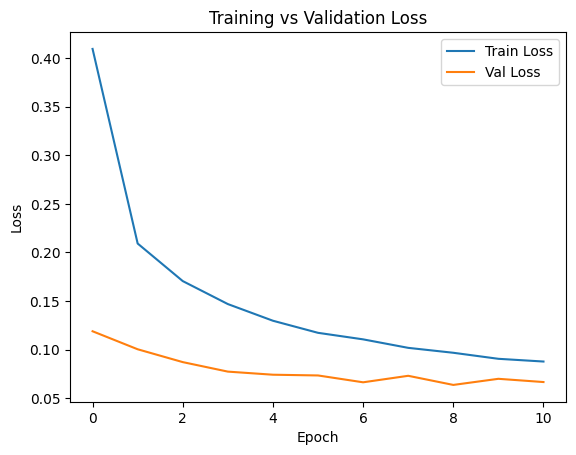

In [24]:
callback_prevention = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True
)

model_training = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    callbacks=[callback_prevention]
)

# Part 6: Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
# Plot training loss
plt.plot(model_training.history['loss'], label='Train Loss')
plt.plot(model_training.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
tf.Tensor([7 2 1 0 4 1 4 9 5 9], shape=(10,), dtype=int64)


<Figure size 1000x100 with 0 Axes>

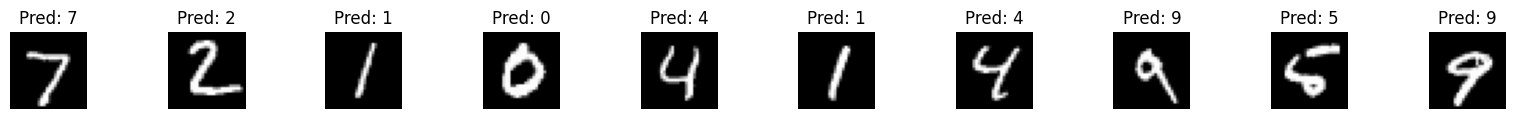

<Figure size 1000x100 with 0 Axes>

In [25]:
# Part 7: Save the model
model.save('mnist_ffnn_model.h5')

# Part 8: Load the model
loaded_model = models.load_model('mnist_ffnn_model.h5')

# Part 9: Make predictions
predictions = loaded_model.predict(x_test)
predicted_classes = tf.argmax(predictions, axis=1)
print(predicted_classes[:10])  # Show first 10 predictions
plt.figure(figsize=(20, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {predicted_classes[i].numpy()}")
    plt.axis('off')
# Part 10: Visualize predictions
plt.figure(figsize=(10, 1))


In [34]:
misclassified_index = tf.where(predicted_classes != y_test).numpy().flatten()
print("misclassified images count", misclassified_index.shape)
print("Test images count", x_test.shape[0])

misclassified images count (220,)
Test images count 10000


Misclassified index:  1681


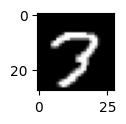

Prediction by model:  7
True label:  3
Misclassified index:  9642


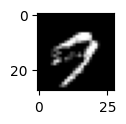

Prediction by model:  7
True label:  9
Misclassified index:  5331


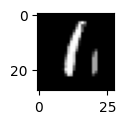

Prediction by model:  6
True label:  1
Misclassified index:  619


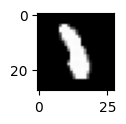

Prediction by model:  8
True label:  1
Misclassified index:  1952


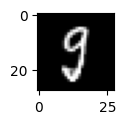

Prediction by model:  3
True label:  9
Misclassified index:  3780


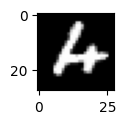

Prediction by model:  6
True label:  4
Misclassified index:  2953


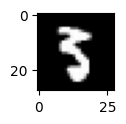

Prediction by model:  5
True label:  3
Misclassified index:  3030


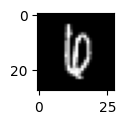

Prediction by model:  8
True label:  6
Misclassified index:  6166


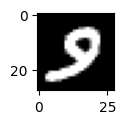

Prediction by model:  3
True label:  9
Misclassified index:  2125


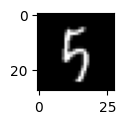

Prediction by model:  9
True label:  5


In [39]:
import random

for x in range(10):
    i = random.randint(0, misclassified_index.shape[0]-1)
    print("Misclassified index: ", misclassified_index[i])

    plt.figure(figsize=(1,1))
    plt.imshow(x_test[misclassified_index[i]].reshape(28,28), cmap="gray")
    plt.axis='off'
    plt.show()

    print("Prediction by model: ", predicted_classes[misclassified_index[i]].numpy())
    print("True label: ", y_test[misclassified_index[i]])